**GROUP 1 (EXPLORER) - Stage 2**

Anggota:

- Imam Maghfir Ramadhan
- Marcellinus Putra Wijaya
- Syaiful Adri
- St S Bintang Pratama Dumatubun
- Muhamad Zen Fikri
- Wasis Prasetyo
- Puspita Ayu Utami
- Putri Sausan

In [660]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [661]:
#READING DATA FROM GOOGLE DRIVE - WILL BE DELETED(?)

import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

os.chdir('/content/drive/MyDrive/Rakamin/Rakamin HW Dataset')
os.getcwd()

'/content/drive/MyDrive/Rakamin/Rakamin HW Dataset'

In [662]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# loading dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#**STAGE 1 - EDA**

## 1.) Descriptive Statistics

In [663]:
# loading dataset
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [664]:
# checking the shape of the dataset
df.shape

(10000, 14)

In [665]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Semua tipe data sudah sesuai, tidak perlu mengubah tipe data

In [666]:
# cek missing value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Tidak ada data kosong (null value) pada dataset

In [667]:
# check data duplicated
df.duplicated().sum()

0

Tidak ada data yang duplikat

In [668]:
# Renaming
df.rename(columns={'Exited':'Churn'},inplace=True)

# Renaming the column 'Exited' to 'Churn
numericals = df[['CreditScore',	'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
categorical = df[['Geography', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Gender', 'Churn']]
categorical_string = categorical.astype(str)

In [669]:
# statistics summary
numericals.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [670]:
categorical_string.describe(include = 'object')

,Geography,NumOfProducts,HasCrCard,IsActiveMember,Gender,Churn
count,10000,10000,10000,10000,10000,10000
unique,3,4,2,2,2,2
top,France,1,1,1,Male,0
freq,5014,5084,7055,5151,5457,7963


A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
- Semua tipe data pada dataset sudah sesuai, sedangkan untuk kolom 'exited' diganti dengan nama 'Churn' agar lebih informatif.

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
- Tidak terdapat missing value pada dataset

C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) <br>
- Berdasarkan data yang ada, kolom "balance" memiliki nilai summary yang cukup anomali. Hal ini dapat terlihat dari nilai mean dan mediannya yang cukup berbeda yang dimana mengindikasikan bahwa distribusi dari data ini tidak normal.

## **2.) Univariate Analysis**

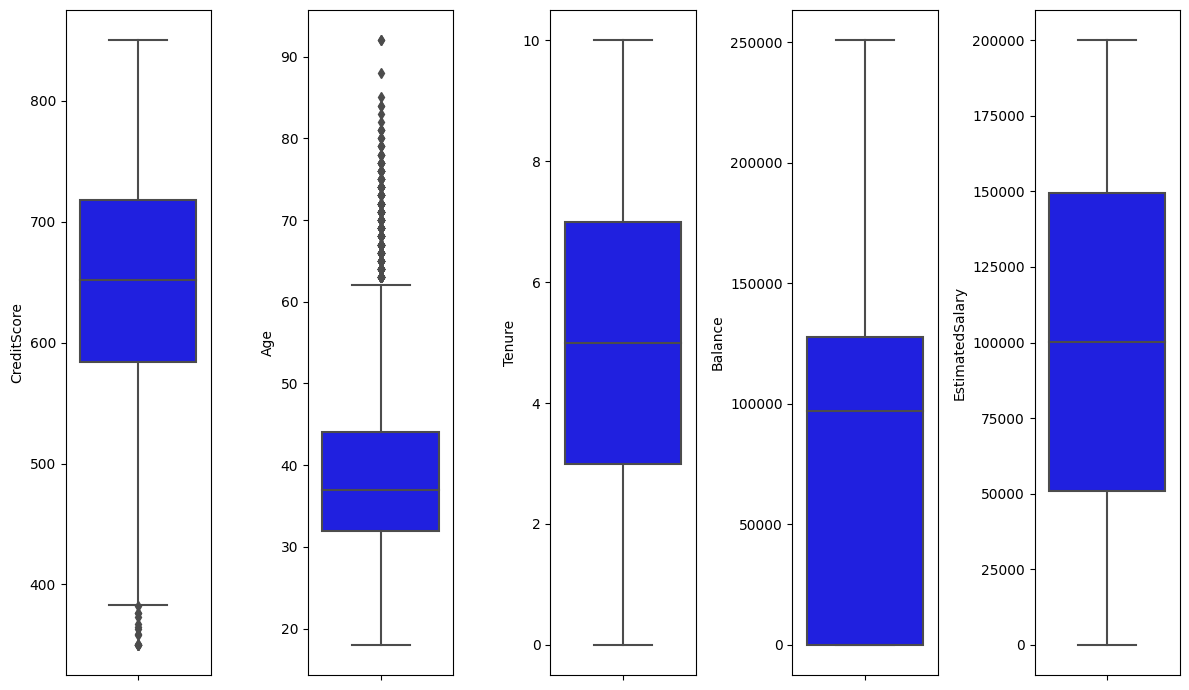

In [671]:
features = numericals.columns  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(12,7))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=numericals[features[i]], color='blue', orient='v')
  plt.tight_layout()

plt.show()  # Untuk menampilkan plotnya

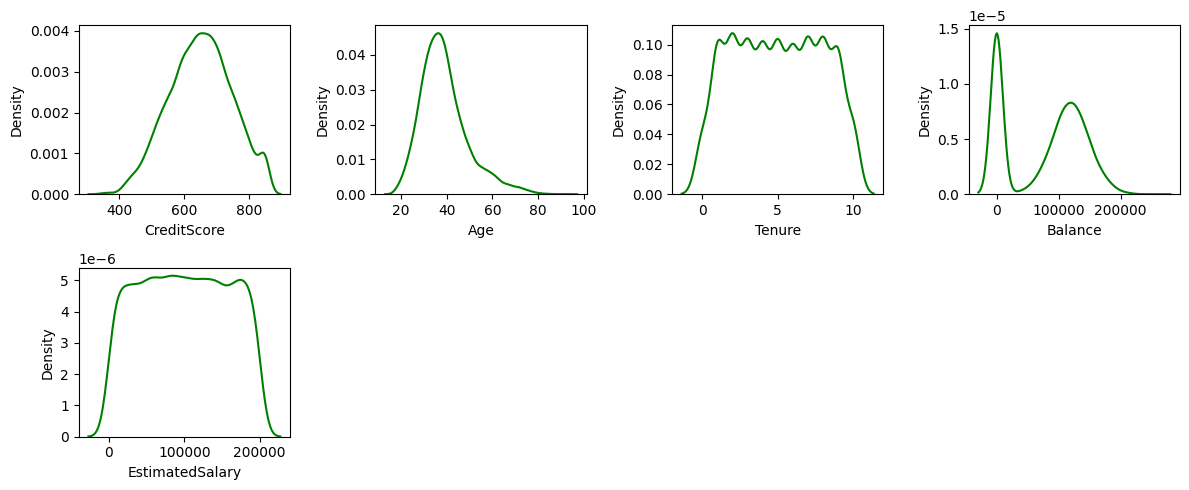

In [672]:
features = numericals.columns  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(12,5))
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x = df[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

plt.show()  # Untuk menampilkan plotnya

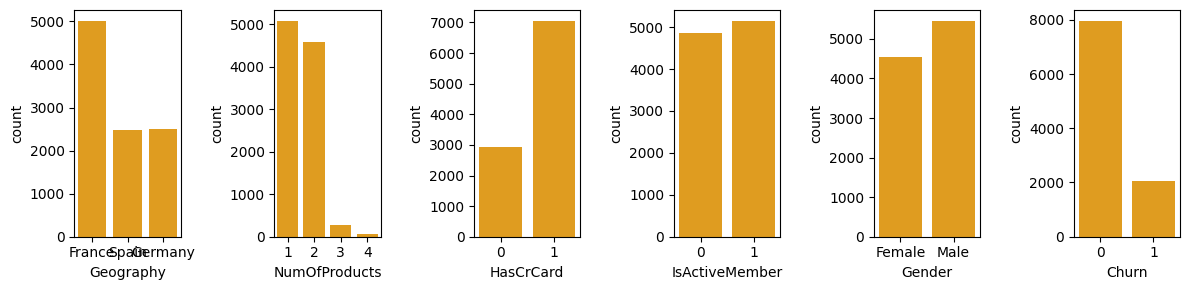

In [673]:
features = categorical.columns  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(12,3))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.countplot(x=df[features[i]], color='orange')
  plt.tight_layout()

**Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing**

* Terlihat pada boxplot chart bahwa pada kolom 'creditscore', 'Age', 'NumOfProducts' terdapat outlier.
* Dari kdeplot yang menunjukkan skewness dari data tersebut, dapat terlihat bahwa sebagian besar kolom 'Age' cenderung positively skew. Sedangkan untuk kolom 'Balance'cenderung memiliki distribusi bimodal dan kolom 'NumOfProducts' cenderung memiliki distribusi multimodal.
* Dari kolom2 categorical yang ada dapat terlihat bahwa kolom  'Geography' didominasi oleh France, kolom 'Gender' didominasi oleh Male, Kolom 'Churn' lebih banyak yang tidak churn (value = 0), kolom 'HasCrCard' didomiasi oleh nasabah yang memiliki kartu kredit (value = 1), dan kolom 'IsActiveMember' didominasi oleh nasabah yang aktif.
* Untuk next step yang harus di follow up saat data pre-processing ialah handling data outlier, melakukan label encoding (untuk kolom 'gender', kolom 'usia' (dikategorikan menjadi dewasa dll), kolom 'negara' (melakukan one-hot encoding)), normalisasi, standarisasi, dan class imbalance.

## **3.) Multivariate Analysis**

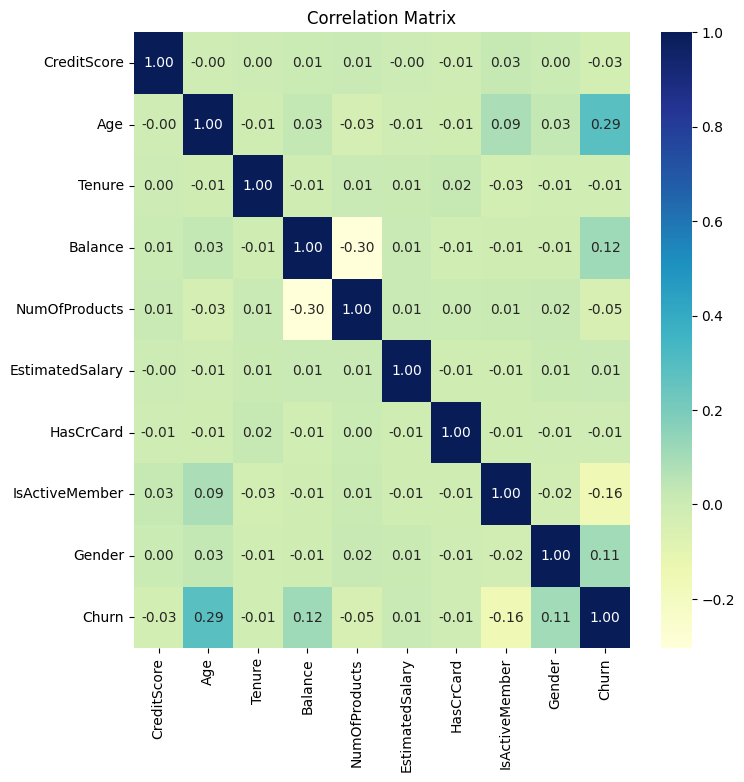

In [674]:
korelasi = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','HasCrCard','IsActiveMember','Gender','Churn']]
map_gender = {
    'Male':0,
    'Female':1,
}
korelasi['Gender'] = korelasi['Gender'].map(map_gender)
df_x = korelasi
plt.figure(figsize=(8,8))
sns.heatmap(df_x.corr(),annot=True,cmap='YlGnBu',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1500x1500 with 0 Axes>

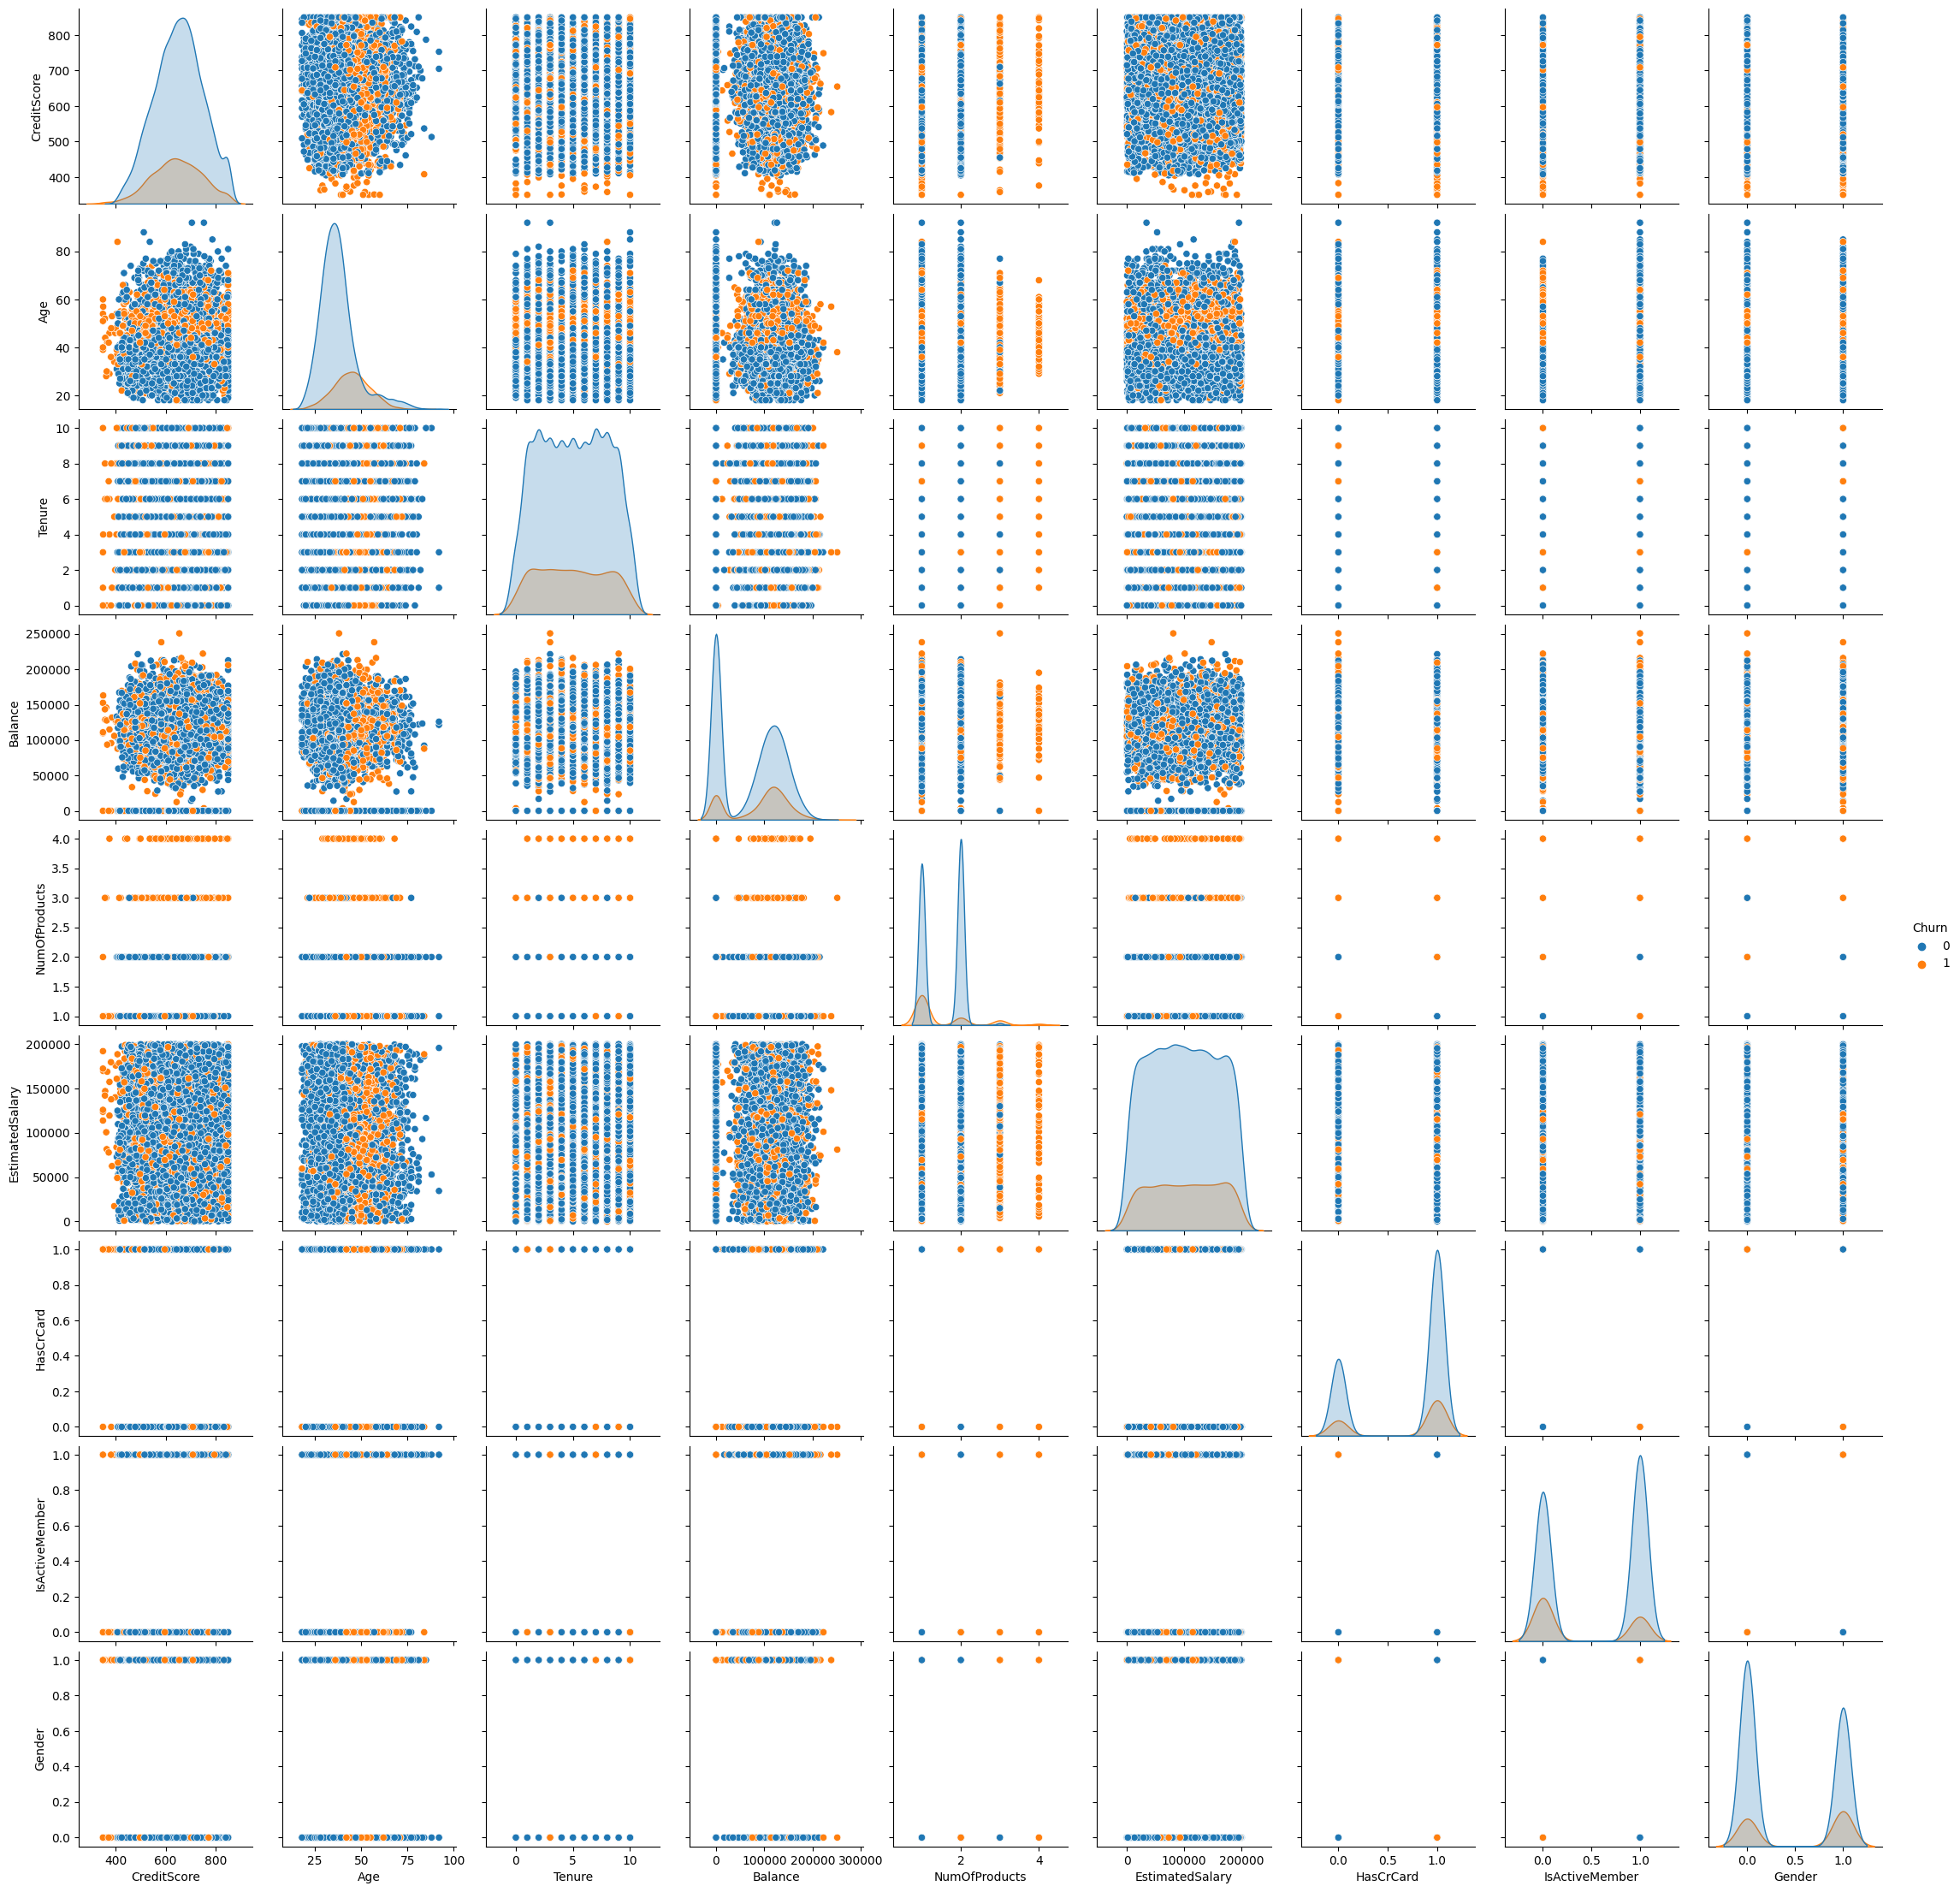

In [675]:
plt.figure(figsize=(15,15))
sns.pairplot(df_x, hue='Churn', diag_kind='kde')

In [676]:
df_x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Gender,Churn
0,619,42,2,0.00,1,101348.88,1,1,1,1
1,608,41,1,83807.86,1,112542.58,0,1,1,0
2,502,42,8,159660.80,3,113931.57,1,0,1,1
3,699,39,1,0.00,2,93826.63,0,0,1,0
4,850,43,2,125510.82,1,79084.10,1,1,1,0


In [677]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='IsActiveMember', ylabel='count'>

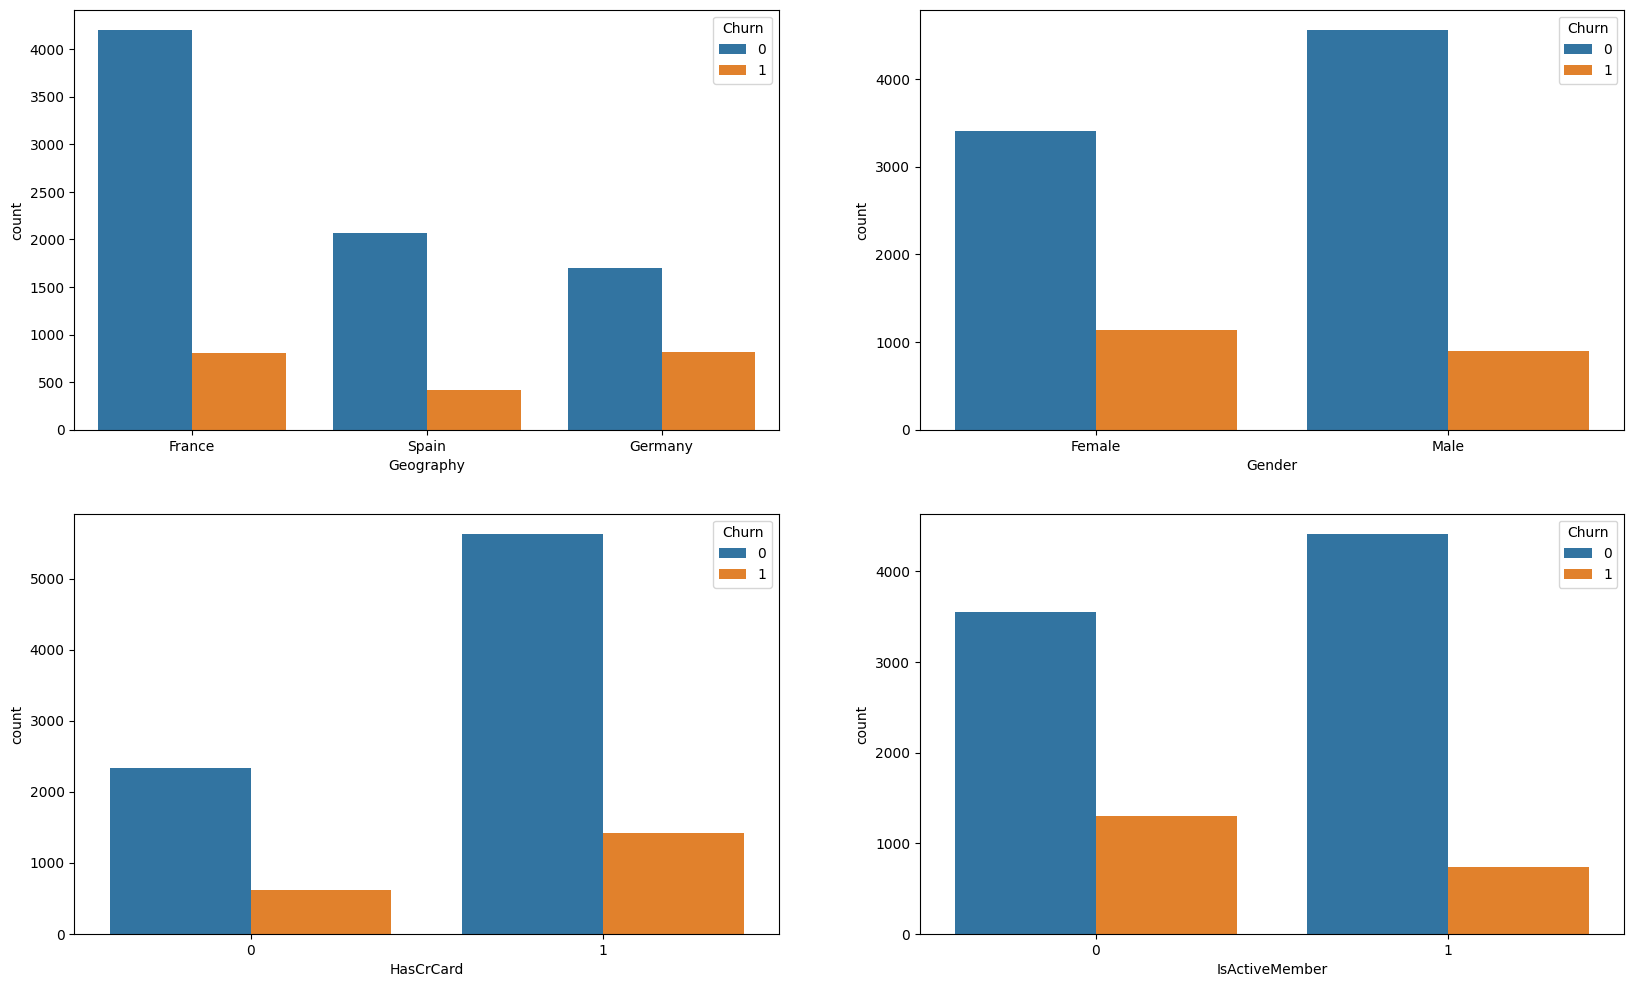

In [678]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Churn',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Churn',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Churn',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Churn',data = df, ax=axarr[1][1])

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
- Kolom "churn" memiliki korelasi positive yang moderate/menengah terhadap kolom "age" (korelasi = 0.29), "balance" (korelasi = 0.12), dan "Gender" (korelasi = 0.11). Sedangkan, pada kolom "IsActiveMember" (korelasi = -0.16) memiliki korelasi negative. Oleh karena itu, feature-feature tersebut harus dipertahanakan.
- Nasabah yang memiliki produk 3 & 4 cenderung churn

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
- Pada kolom "balance" juga memiliki korelasi negative (korelasi = -0.30) terhadap "NumOfProducts". Oleh karena itu, untuk feature ini diperlukan analisa multikolinearitas.


## 4.) Business Insight

Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.

### Kategori Umur Berdasarkan Customer yang Churned

a) Klasifikasi Umur

Menurut Kemenkes, usia terbagi menjadi kelompok berikut
- 0  - 11 tahun = Kanak-kanak (child)
- 12 - 25 tahun = Remaja (teenager)
- 26 - 45 tahun = Dewasa (adult)
- 46 - 65 tahun = Lansia (elderly)
- '> 65 tahun = Manula'

Link = https://jurnal.dpr.go.id/index.php/aspirasi/article/download/1589/pdf

In [679]:
#perubahan umur menjadi kelompok umur berdasarkan kemenkes
group_age = []
for age in df['Age'] :
    if age >= 0 and age <= 11 :
        age = 'child'
    elif age >= 12 and age <= 25 :
        age = 'teenager'
    elif age >= 26 and age <= 45 :
        age = 'adult'
    elif age >= 46 and age <= 65 :
        age = 'elderly'
    else :
        age = 'seniors'
    group_age.append(age)

#memasukkan kolom age baru yang telah diubah menjadi kategorikal
df['Group_Age'] = group_age
df['Group_Age'].value_counts()

adult       7278
elderly     1847
teenager     611
seniors      264
Name: Group_Age, dtype: int64

In [680]:
#diubah a b c... agar saat diplot urut
map_age = {
    'teenager' : 'a.teenager',
    'adult' : 'b.adult',
    'elderly': 'c.elderly',
    'seniors': 'd.seniors'
}
df['Group_Age'] = df['Group_Age'].map(map_age)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Group_Age
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,b.adult
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,b.adult
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,b.adult
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,b.adult
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,b.adult


In [681]:
#menghitung unique value
df['Group_Age'].value_counts()

b.adult       7278
c.elderly     1847
a.teenager     611
d.seniors      264
Name: Group_Age, dtype: int64

In [682]:
#membuat fungsi pivot table agar langsung mendapatkan nilai persen customer
def tabel_pivot(x) : # x=nama kolom yang akan di group by

    #pivot table
    group1 = pd.pivot_table(data = df,
                            index = [x,'Churn'],
                            values = ['CreditScore'],
                            aggfunc = {'CreditScore':'count'}).reset_index()
    group1.columns = [x,'Churn','Total_Customer']

    #mendapatkan persentase total customer
    list_kosong=[]
    for a in group1[x].unique() :
        group = group1[group1[x] == a]
        total = group['Total_Customer'].sum()
        for b in range(len(group)) :
            group = group.reset_index(drop = True)
            isi = group['Total_Customer'][b]/total*100
            isi = round(isi,2)
            list_kosong.append(isi)
    group1['Persen_Customer1'] = list_kosong #total 100 persen kolom 'x'

    #sorting berdasarkan kolum churn
    group1 = group1.sort_values(by='Churn', ascending=True)

    list_kosong=[]
    for a in group1['Churn'].unique() :
        group = group1[group1['Churn'] == a]
        total = group['Total_Customer'].sum()
        for b in range(len(group)) :
            group = group.reset_index(drop = True)
            isi = group['Total_Customer'][b]/total*100
            isi = round(isi,2)
            list_kosong.append(isi)
    group1['Persen_Customer2'] = list_kosong #total 100 persen kolom churn

    #sorting dikembalikan lagi terhap kolom 'x'
    group1 = group1.sort_values(by=x, ascending=True)

    return group1,x

#memanggil fungsi tabel_pivot
group1,x = tabel_pivot('Group_Age')

In [683]:
#reshape group1
group1_reshape = group1.pivot_table(index = x,
                                    columns = 'Churn',
                                    values = 'Persen_Customer1')

In [684]:
display(group1)
display(group1_reshape)

,Group_Age,Churn,Total_Customer,Persen_Customer1,Persen_Customer2
0,a.teenager,0,565,92.47,7.10
1,a.teenager,1,46,7.53,2.26
2,b.adult,0,6244,85.79,78.41
3,b.adult,1,1034,14.21,50.76
4,c.elderly,0,925,50.08,11.62
5,c.elderly,1,922,49.92,45.26
6,d.seniors,0,229,86.74,2.88
7,d.seniors,1,35,13.26,1.72


Churn,0,1
Group_Age,,
a.teenager,92.47,7.53
b.adult,85.79,14.21
c.elderly,50.08,49.92
d.seniors,86.74,13.26


Visualisasi

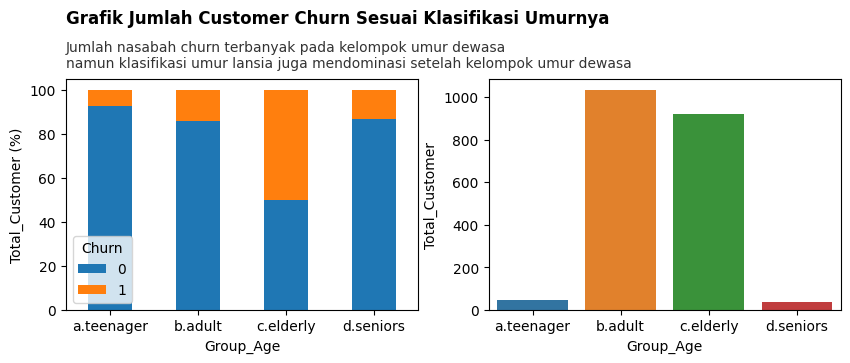

In [685]:
fig, ax = plt.subplots(1,2, figsize = (10,3),sharex=False)

group1_reshape.plot(kind = 'bar', stacked =True, ax=ax[0])
sns.barplot(data=group1[group1['Churn']==1], x='Group_Age', y='Total_Customer')

for tick in ax[0].get_xticklabels():
    tick.set_rotation(360)

#setting
ax[0].set_title('Grafik Jumlah Customer Churn Sesuai Klasifikasi Umurnya',
                loc = 'left' ,pad = 40,fontweight = 'bold')
ax[0].set_ylabel('Total_Customer (%)')
ax[0].set_xlabel('Group_Age')
#subtitle
sub_title = str("Jumlah nasabah churn terbanyak pada kelompok umur dewasa" +
            "\nnamun klasifikasi umur lansia juga mendominasi setelah kelompok umur dewasa ")

x_start, x_end = ax[1].get_xlim()
y_start, y_end = ax[0].get_ylim()
ax[0].text(x=x_start ,y = y_end*1.05
            ,s = sub_title
            ,ha= 'left',alpha = 0.8)

plt.show()


Keterangan :

Dapat terlihat bahwa customer `churn` kebanyakan berada di **usia 26 - 45 (Adults) dan 46 - 65 (Elderly)** dibandingkan dengan usia yang lebih muda. Hal ini bisa saja disebabkan oleh preferensi servis dari setiap kategori umur. Oleh karena itu, bank direkomendasi kan untuk me-review kembali targeted nasabah ini dan bisa membuat strategi khusus dapat berupa program atau promo khusus untuk nasabah tersebut.

### Keaktifan Member Berdasarkan Customer yang Churned

In [686]:
#memanggil fungsi tabel_pivot
group1,x = tabel_pivot('IsActiveMember')
#reshape group1
group1_reshape = group1.pivot_table(index = 'Churn',
                                    columns = x,
                                    values = 'Persen_Customer2')

In [687]:
display(group1)
display(group1_reshape)

,IsActiveMember,Churn,Total_Customer,Persen_Customer1,Persen_Customer2
0,0,0,3547,73.15,44.54
1,0,1,1302,26.85,63.92
2,1,0,4416,85.73,55.46
3,1,1,735,14.27,36.08


IsActiveMember,0,1
Churn,,
0,44.54,55.46
1,63.92,36.08


Visualisasi

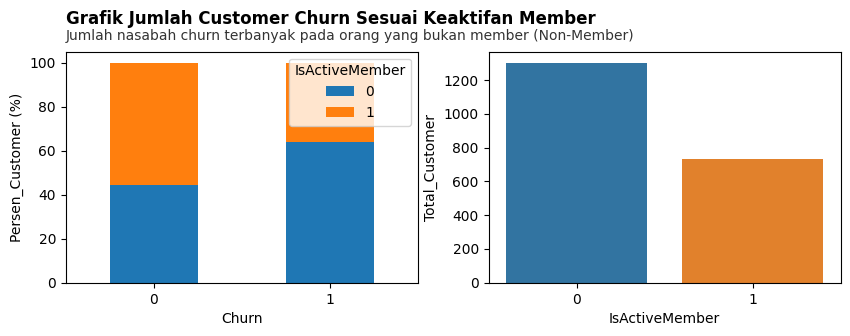

In [688]:
fig, ax = plt.subplots(1,2, figsize = (10,3),sharex=False)

group1_reshape.plot(kind = 'bar', stacked =True, ax=ax[0])
sns.barplot(data=group1[group1['Churn']==1], x=x, y='Total_Customer')

for tick in ax[0].get_xticklabels():
    tick.set_rotation(360)

#setting
ax[0].set_title('Grafik Jumlah Customer Churn Sesuai Keaktifan Member',
                loc = 'left' ,pad = 20,fontweight = 'bold')
ax[0].set_ylabel('Persen_Customer (%)')
ax[0].set_xlabel('Churn')
#subtitle
sub_title = str("Jumlah nasabah churn terbanyak pada orang yang bukan member (Non-Member)")

x_start, x_end = ax[1].get_xlim()
y_start, y_end = ax[0].get_ylim()
ax[0].text(x=x_start ,y = y_end*1.05
            ,s = sub_title
            ,ha= 'left',alpha = 0.8)

plt.show()


Keterangan :
Kebanyakan customer yang `churn` ialah customer yang **bukan member yang aktif**. Oleh karena itu, direkomendasikan untuk bank membuat sebuah program yang dimana dapat membuat member yang tidak aktif ini untuk menjadi aktif untuk menghindari customer menjadi churn

### Kategori Gender Berdasarkan Customer yang Churned

In [689]:
#memanggil fungsi tabel_pivot
group1,x = tabel_pivot('Gender')
#reshape group1
group1_reshape = group1.pivot_table(index = 'Churn',
                                    columns = x,
                                    values = 'Persen_Customer2')

In [690]:
display(group1)
display(group1_reshape)

,Gender,Churn,Total_Customer,Persen_Customer1,Persen_Customer2
0,Female,0,3404,74.93,42.75
1,Female,1,1139,25.07,55.92
2,Male,0,4559,83.54,57.25
3,Male,1,898,16.46,44.08


Gender,Female,Male
Churn,,
0,42.75,57.25
1,55.92,44.08


Visualisasi

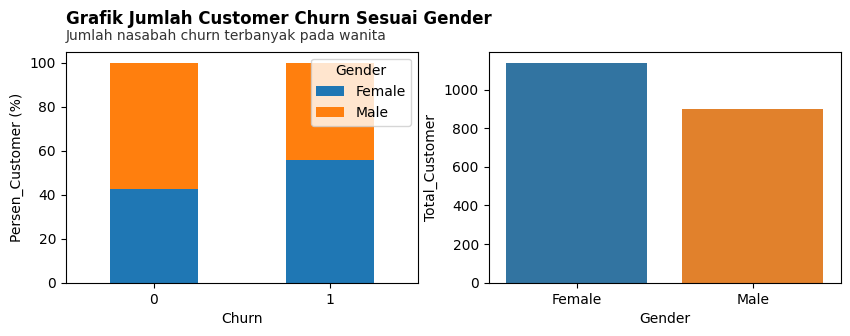

In [691]:
fig, ax = plt.subplots(1,2, figsize = (10,3),sharex=False)

group1_reshape.plot(kind = 'bar', stacked =True, ax=ax[0])
sns.barplot(data=group1[group1['Churn']==1], x=x, y='Total_Customer')

for tick in ax[0].get_xticklabels():
    tick.set_rotation(360)

#setting
ax[0].set_title('Grafik Jumlah Customer Churn Sesuai Gender',
                loc = 'left' ,pad = 20,fontweight = 'bold')
ax[0].set_ylabel('Persen_Customer (%)')
ax[0].set_xlabel('Churn')
#subtitle
sub_title = str("Jumlah nasabah churn terbanyak pada wanita")

x_start, x_end = ax[1].get_xlim()
y_start, y_end = ax[0].get_ylim()
ax[0].text(x=x_start ,y = y_end*1.05
            ,s = sub_title
            ,ha= 'left',alpha = 0.8)

plt.show()

Keterangan :
Kebanyakan customer yang `churn` ialah customer yang **female**. Oleh karena itu, direkomendasikan untuk bank membuat sebuah program khusus untuk men-engage customer perempuan untuk mencegah customer menjadi churn.

# **STAGE 2 - DATA PRE-PROCESSING**

## 1.) Data Cleansing

### Handle Missing Value

In [692]:
# cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
 14  Group_Age        10000 non-null  object 
dtypes: float64(2), int64(9), object(4)
memory usage: 1.1+ MB


In [693]:
df.isna().sum() # menampilkan jumlah missing value setiap kolom

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
Group_Age          0
dtype: int64

Semua tipe data sudah sesuai dan tidak ada data kosong

### Handle Duplicated Data

In [694]:
df.duplicated().sum() # check data duplikat

0

Tidak ada data yang duplikat pada dataset

## 2.) Feature Engineering

### Analisa Multikolinearitas Antar Feature (NumOfProducts & Balance)

In [695]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

selected_columns = ['NumOfProducts', 'Balance']
df_subset = df[selected_columns]
X = add_constant(df_subset)

# Menghitung nilai VIF untuk setiap feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        Variable        VIF
0          const  12.445353
1  NumOfProducts   1.101959
2        Balance   1.101959


**Summary**
<br> Dari hasil yang ada, nilai VIF yang ada relatif kecil (VIF < 5) yang menunjukkan bahwa tidak ada bukti multikolinearitas antara kolom "NumOfProducts" dan "Balance". Oleh karena itu, kedua kolom tersebut tetap digunakan sebagai feature.

### Feature Selection

In [696]:
df.sample(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Group_Age
817,818,15806438,Chiabuotu,580,Germany,Female,42,2,123331.36,1,0,0,103516.08,1,b.adult
4646,4647,15665008,Sidorov,805,Germany,Female,26,8,42712.87,2,1,1,28861.69,0,b.adult


In [697]:
#melakukan drop kolom 'RowNumber', 'Surname', 'CustomerId'
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis = 1) # feature 'Surname', 'RowNumber', 'CustomerID' tidak penting terhadap taget


In [698]:
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Group_Age
1376,457,France,Male,41,8,73700.12,3,1,1,185750.02,1,b.adult
2896,782,France,Female,33,2,94493.03,1,0,1,101866.39,0,b.adult


### Feature Extraction

In [699]:
# Balance Categories
df['Balance_Category'] = pd.cut(df['Balance'], bins=[-0.001, 97199, 127644, 251000], labels=['Low', 'Medium', 'High'])

# Credit Score Ranges
df['CreditScore_Range'] = pd.cut(df['CreditScore'], bins=[349, 584, 652, 718, 850], labels=['Poor', 'Fair', 'Good', 'Excellent'])

# Tenure Categories
df['Tenure_Category'] = pd.cut(df['Tenure'], bins=[-0.001, 3, 5, 10], labels=['Short Term', 'Medium Term', 'Long Term'])

# Salary Range
df['Salary_Range'] = pd.cut(df['EstimatedSalary'], bins=[0, 51002, 100194, 149388, 200000], labels=['Low', 'Medium', 'High','Very High'])

Pembagian range setiap kategori didasari dari nilai min, quartile (1,2,3), dan max dari masing-masing kolom

In [700]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Group_Age,Balance_Category,CreditScore_Range,Tenure_Category,Salary_Range
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,b.adult,Low,Fair,Short Term,High
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,b.adult,Low,Fair,Short Term,High
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,b.adult,High,Poor,Long Term,High
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,b.adult,Low,Good,Short Term,Medium
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,b.adult,Medium,Excellent,Short Term,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,b.adult,Low,Excellent,Medium Term,Medium
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,b.adult,Low,Poor,Long Term,High
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,b.adult,Low,Good,Long Term,Low
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,b.adult,Low,Excellent,Short Term,Medium


In [701]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        10000 non-null  int64   
 1   Geography          10000 non-null  object  
 2   Gender             10000 non-null  object  
 3   Age                10000 non-null  int64   
 4   Tenure             10000 non-null  int64   
 5   Balance            10000 non-null  float64 
 6   NumOfProducts      10000 non-null  int64   
 7   HasCrCard          10000 non-null  int64   
 8   IsActiveMember     10000 non-null  int64   
 9   EstimatedSalary    10000 non-null  float64 
 10  Churn              10000 non-null  int64   
 11  Group_Age          10000 non-null  object  
 12  Balance_Category   10000 non-null  category
 13  CreditScore_Range  10000 non-null  category
 14  Tenure_Category    10000 non-null  category
 15  Salary_Range       10000 non-null  category
dtypes: ca

Beberapa ide features yang bisa ditambahkan yang mungkin akan membantu meningkatkan performansi model, antara lain:
- **Balance-to-Salary Ratio**: Menghitung rasio antara saldo akun dan estimasi gaji pelanggan. Rasio ini dapat memberikan gambaran tentang seberapa besar bagian dari gaji yang disimpan atau diinvestasikan oleh pelanggan.
- **Average Transaction Amount**: Menghitung rata-rata jumlah transaksi per pelanggan. Ini dapat memberikan wawasan tentang seberapa sering pelanggan berinteraksi dengan produk atau layanan, dan seberapa besar nilai transaksi yang mereka lakukan.
- **Tenure and NumOfProducts Interaction**: Fitur ini dapat memberikan model informasi tambahan tentang seberapa intensif pelanggan menggunakan produk atau layanan selama periode waktu tertentu. Dimana dapat diasumsikan bahwa semakin lama seseorang menjadi pelanggan dan semakin banyak produk yang mereka miliki, semakin kuat keterikatan mereka dengan layanan atau produk perusahaan tersebut.
- **Salary to CreditScore Ratio**: fitur ini mencerminkan seberapa besar pendapatan seseorang dibandingkan dengan skor kredit mereka. Rasio ini dapat memberikan wawasan tentang seberapa baik seseorang mengelola utang atau kredit relatif terhadap tingkat pendapatan mereka.

**Tetapi untuk 4 ide fitur tambahan ini tidak akan ditambahkan atau diimplementasikan ke dataset.**


### Feature Encoding

In [702]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Group_Age,Balance_Category,CreditScore_Range,Tenure_Category,Salary_Range
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,b.adult,Low,Fair,Short Term,High
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,b.adult,Low,Fair,Short Term,High
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,b.adult,High,Poor,Long Term,High
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,b.adult,Low,Good,Short Term,Medium
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,b.adult,Medium,Excellent,Short Term,Medium


In [703]:
# one hot encoding
for cat in ['Geography']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df =  df.join(onehots)

In [704]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Group_Age,Balance_Category,CreditScore_Range,Tenure_Category,Salary_Range,Geography_France,Geography_Germany,Geography_Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,b.adult,Low,Fair,Short Term,High,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,b.adult,Low,Fair,Short Term,High,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,b.adult,High,Poor,Long Term,High,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,b.adult,Low,Good,Short Term,Medium,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,b.adult,Medium,Excellent,Short Term,Medium,0,0,1


In [705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        10000 non-null  int64   
 1   Geography          10000 non-null  object  
 2   Gender             10000 non-null  object  
 3   Age                10000 non-null  int64   
 4   Tenure             10000 non-null  int64   
 5   Balance            10000 non-null  float64 
 6   NumOfProducts      10000 non-null  int64   
 7   HasCrCard          10000 non-null  int64   
 8   IsActiveMember     10000 non-null  int64   
 9   EstimatedSalary    10000 non-null  float64 
 10  Churn              10000 non-null  int64   
 11  Group_Age          10000 non-null  object  
 12  Balance_Category   10000 non-null  category
 13  CreditScore_Range  10000 non-null  category
 14  Tenure_Category    10000 non-null  category
 15  Salary_Range       10000 non-null  category
 16  Geogr

In [706]:
df = df.drop(columns =['Geography']).copy()

In [707]:
# label encoding
map_gender = {'Male':0,'Female':1}
map_grup_age = { 'a.teenager':0,'b.adult':1,'c.elderly':2,'d.seniors':3}
map_balance = {'Low':0, 'Medium':1, 'High':2}
map_credit_score = {'Poor':0, 'Fair':1, 'Good':2, 'Excellent':3}
map_tenure = {'Short Term':0, 'Medium Term':1, 'Long Term':2}
map_salary = {'Low':0, 'Medium':1, 'High':2, 'Very High':3}

df['Gender'] = df['Gender'].map(map_gender)
df['Group_Age'] = df['Group_Age'].map(map_grup_age)
df['Balance_Category'] = df['Balance_Category'].map(map_balance)
df['CreditScore_Range'] = df['CreditScore_Range'].map(map_credit_score)
df['Tenure_Category'] = df['Tenure_Category'].map(map_tenure)
df['Salary_Range'] = df['Salary_Range'].map(map_salary)

In [708]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Group_Age,Balance_Category,CreditScore_Range,Tenure_Category,Salary_Range,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,2,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,1,0,1,0,2,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,2,0,2,2,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,2,0,1,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,1,1,3,0,1,0,0,1


In [709]:
df.info() # checking semua column telah menjadi data numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        10000 non-null  int64   
 1   Gender             10000 non-null  int64   
 2   Age                10000 non-null  int64   
 3   Tenure             10000 non-null  int64   
 4   Balance            10000 non-null  float64 
 5   NumOfProducts      10000 non-null  int64   
 6   HasCrCard          10000 non-null  int64   
 7   IsActiveMember     10000 non-null  int64   
 8   EstimatedSalary    10000 non-null  float64 
 9   Churn              10000 non-null  int64   
 10  Group_Age          10000 non-null  int64   
 11  Balance_Category   10000 non-null  category
 12  CreditScore_Range  10000 non-null  category
 13  Tenure_Category    10000 non-null  category
 14  Salary_Range       10000 non-null  category
 15  Geography_France   10000 non-null  uint8   
 16  Geogr

## 3.) Split Data to Train and Test

In [710]:
from sklearn.model_selection import train_test_split
x = df.loc[:, df.columns != 'Churn']
y = df['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        8000 non-null   int64   
 1   Gender             8000 non-null   int64   
 2   Age                8000 non-null   int64   
 3   Tenure             8000 non-null   int64   
 4   Balance            8000 non-null   float64 
 5   NumOfProducts      8000 non-null   int64   
 6   HasCrCard          8000 non-null   int64   
 7   IsActiveMember     8000 non-null   int64   
 8   EstimatedSalary    8000 non-null   float64 
 9   Group_Age          8000 non-null   int64   
 10  Balance_Category   8000 non-null   category
 11  CreditScore_Range  8000 non-null   category
 12  Tenure_Category    8000 non-null   category
 13  Salary_Range       8000 non-null   category
 14  Geography_France   8000 non-null   uint8   
 15  Geography_Germany  8000 non-null   uint8   
 16  Geo

## 4.) Handle Outlier

In [711]:
numerical = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

In [712]:
# Using Z-score for outlier removal
xtrain_dummy = x_train
ytrain_dummy = y_train
for col in numerical:
    xtrain_dummy =x_train_after_z
    ytrain_dummy =y_train_after_z

    z_scores = np.abs(stats.zscore(xtrain_dummy[col]))
    filter_mask_z = (z_scores < 3)  # Adjust the threshold as needed
    x_train_after_z = xtrain_dummy[filter_mask_z]
    y_train_after_z = ytrain_dummy[filter_mask_z]

In [713]:
x_train_after_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7780 entries, 9254 to 7270
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        7780 non-null   int64   
 1   Gender             7780 non-null   int64   
 2   Age                7780 non-null   int64   
 3   Tenure             7780 non-null   int64   
 4   Balance            7780 non-null   float64 
 5   NumOfProducts      7780 non-null   int64   
 6   HasCrCard          7780 non-null   int64   
 7   IsActiveMember     7780 non-null   int64   
 8   EstimatedSalary    7780 non-null   float64 
 9   Group_Age          7780 non-null   int64   
 10  Balance_Category   7780 non-null   category
 11  CreditScore_Range  7780 non-null   category
 12  Tenure_Category    7780 non-null   category
 13  Salary_Range       7780 non-null   category
 14  Geography_France   7780 non-null   uint8   
 15  Geography_Germany  7780 non-null   uint8   
 16  Geo

In [714]:
# Using IQR for outlier removal
xtrain_dummy = x_train
ytrain_dummy = y_train
for col in numerical:
    xtrain_dummy =x_train_after_iqr
    ytrain_dummy =y_train_after_iqr

    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    filter_mask_iqr = ~((xtrain_dummy[col] < (Q1 - 1.5 * IQR)) | (xtrain_dummy[col] > (Q3 + 1.5 * IQR)))
    x_train_after_iqr = xtrain_dummy[filter_mask_iqr]
    y_train_after_iqr = ytrain_dummy[filter_mask_iqr]

In [715]:
x_train_after_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7515 entries, 9254 to 7270
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        7515 non-null   int64   
 1   Gender             7515 non-null   int64   
 2   Age                7515 non-null   int64   
 3   Tenure             7515 non-null   int64   
 4   Balance            7515 non-null   float64 
 5   NumOfProducts      7515 non-null   int64   
 6   HasCrCard          7515 non-null   int64   
 7   IsActiveMember     7515 non-null   int64   
 8   EstimatedSalary    7515 non-null   float64 
 9   Group_Age          7515 non-null   int64   
 10  Balance_Category   7515 non-null   category
 11  CreditScore_Range  7515 non-null   category
 12  Tenure_Category    7515 non-null   category
 13  Salary_Range       7515 non-null   category
 14  Geography_France   7515 non-null   uint8   
 15  Geography_Germany  7515 non-null   uint8   
 16  Geo

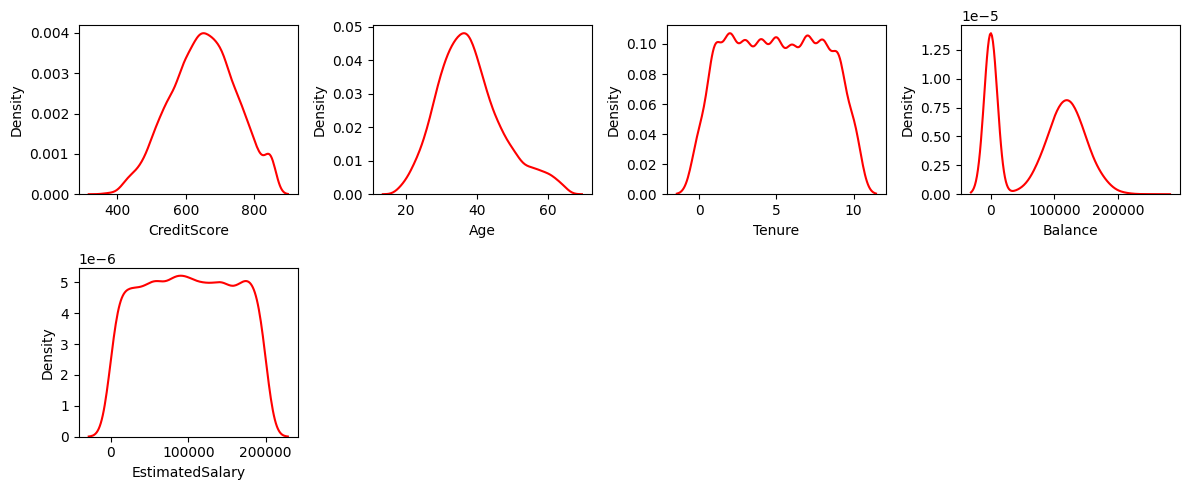

In [716]:
#membandingkan data setelah filter menggunakan plot
#data setelah filter z
plt.figure(figsize=(12,5))
for i in range(0, len(numerical)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x = x_train_after_z[numerical[i]], color = 'red')
  plt.xlabel(numerical[i])
  plt.tight_layout()

plt.show()

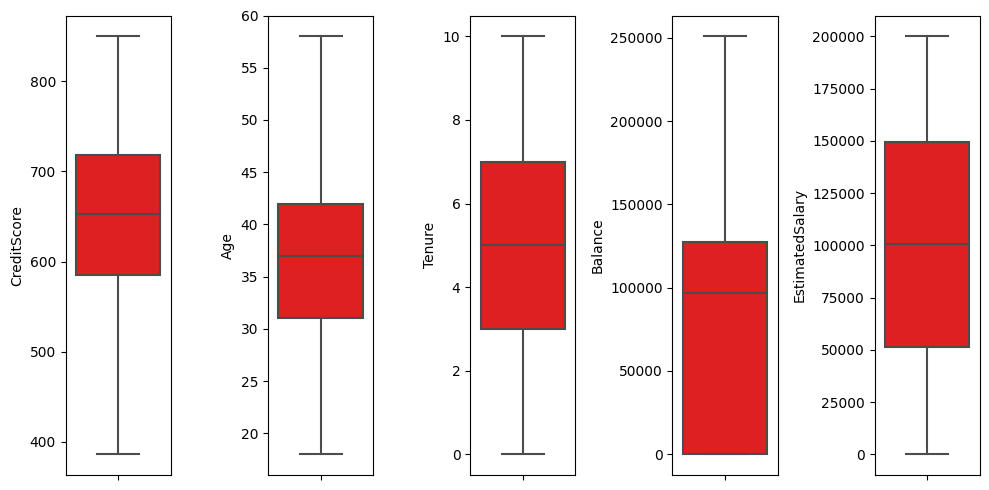

In [717]:
#data setelah filter iqr
plt.figure(figsize=(10,5))
for i in range(0, len(numerical)):
  plt.subplot(1, len(numerical),i+1)
  sns.boxplot(y=x_train_after_iqr[numerical[i]], color ='red', orient='v')
  plt.tight_layout()



In [718]:
n_z       = (x_train['CreditScore'].count() - x_train_after_z['CreditScore'].count()) / x_train['CreditScore'].count() * 100
n_kuartil = (x_train['CreditScore'].count() - x_train_after_iqr['CreditScore'].count()) / x_train['CreditScore'].count() * 100
print('perbedaan jumlah data menggunakan z   : '+ str(round(n_z,2)) + '%')
print('perbedaan jumlah data menggunakan IQR : '+ str(round(n_kuartil,2)) + '%')

perbedaan jumlah data menggunakan z   : 2.75%
perbedaan jumlah data menggunakan IQR : 6.06%


**Output**

Berdasarkan analisa outlier yang ada, dapat terlihat bahwa outlier kebanyakan terdapat pada kolom age yang dimana distribusi age dari nasabah yang ada itu wajar adanya. Oleh karena itu, proses outlier removal pada model ini tidak dilakukan dan bisa langsung menggunakan dataframe yang sudah di split untuk proses selanjutnya.

## 5.) Feature Transformation

In [719]:
#data
df_norm_train = x_train
df_norm_test = x_test

numerical = numerical

In [720]:
#menggunakan fitur normalisasi
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training set and transform the training set
for col in numerical:
    df_norm_train[col] = scaler.fit_transform(df_norm_train[col].values.reshape(-1, 1))

# Use the same scaler to transform the test set (without fitting)
for col in numerical:
    df_norm_test[col] = scaler.transform(df_norm_test[col].values.reshape(-1, 1))

In [721]:
df_norm_train.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Group_Age,Geography_France,Geography_Germany,Geography_Spain
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.603295,0.454750,0.282402,0.500388,0.303319,1.531375,0.703500,0.512750,0.502006,1.177125,0.499250,0.251375,0.249375
std,0.192732,0.497979,0.142148,0.288182,0.248950,0.579705,0.456743,0.499869,0.287766,0.567267,0.500031,0.433831,0.432678
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.470000,0.000000,0.189189,0.300000,0.000000,1.000000,0.000000,0.000000,0.256523,1.000000,0.000000,0.000000,0.000000
50%,0.606000,0.000000,0.256757,0.500000,0.384409,1.000000,1.000000,1.000000,0.502288,1.000000,0.000000,0.000000,0.000000
75%,0.738000,1.000000,0.351351,0.700000,0.508618,2.000000,1.000000,1.000000,0.747975,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [722]:
df_norm_test.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Group_Age,Geography_France,Geography_Germany,Geography_Spain
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.002782,0.452500,-0.000255,-0.000425,0.389887,1.525500,0.713500,0.524500,0.493474,1.173500,0.510000,0.249000,0.241000
std,0.000489,0.497863,0.000052,0.000015,0.310857,0.589511,0.452239,0.499524,0.287526,0.560852,0.500025,0.432542,0.427797
min,0.001300,0.000000,-0.000361,-0.000451,-0.000451,1.000000,0.000000,0.000000,-0.000393,0.000000,0.000000,0.000000,0.000000
25%,0.002441,0.000000,-0.000291,-0.000441,-0.000451,1.000000,0.000000,0.000000,0.248260,1.000000,0.000000,0.000000,0.000000
50%,0.002784,0.000000,-0.000261,-0.000426,0.498830,1.000000,1.000000,1.000000,0.492402,1.000000,1.000000,0.000000,0.000000
75%,0.003113,1.000000,-0.000230,-0.000411,0.639292,2.000000,1.000000,1.000000,0.736575,1.000000,1.000000,0.000000,0.000000
max,0.003802,1.000000,0.000010,-0.000401,1.080744,4.000000,1.000000,1.000000,1.000109,3.000000,1.000000,1.000000,1.000000


In [723]:
df = df_norm_train

Jika normalisasi dibandingkan dengan menggunakan standarisasi memang normaliasi kurang robust terhadap outlier, namun karena data sudah dilakukan pengecekan outlier maka penggunaan motode transformasi normalisasi seharusnya tidak bermasalah

## 6.) Handle Class Imbalance

In [724]:
# Menampilkan distribusi kelas sebelum oversampling
class_distribution_before = pd.Series(y_train).value_counts()
print("Class distribution before oversampling:")
print(class_distribution_before)

Class distribution before oversampling:
0    6356
1    1644
Name: Churn, dtype: int64


In [725]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Oversample Data
smote = SMOTE()
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)

# Undersample Data
rus = RandomUnderSampler()
x_train_undersampled, y_train_undersampled = rus.fit_resample(x_train, y_train)

Output

In [726]:
# distribusi kelas setelah oversampling
class_distribution_after_over = pd.Series(y_train_oversampled).value_counts()
print("\nClass distribution after oversampling:")
print(class_distribution_after_over)


Class distribution after oversampling:
0    6356
1    6356
Name: Churn, dtype: int64


In [727]:
# distribusi kelas setelah undersampling
class_distribution_after_under = pd.Series(y_train_undersampled).value_counts()
print("\nClass distribution after undersampling:")
print(class_distribution_after_under)


Class distribution after undersampling:
0    1644
1    1644
Name: Churn, dtype: int64


**Summary**

Jadi untuk data imbalance, akan digunakan under sampling dikarenakan target prediksi category churn (value = 1) lebih sedikit, sehingga jika oversampling digunakan bisa menyebabkan bias (dikarenakan jumlah data sintesis yang akan ter-generate akan relatif banyak).